Proyecto 1


In [96]:

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import datetime, os
from scipy.stats import norm
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import joblib



In [3]:
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#2. Get the file
downloaded = drive.CreateFile({'id':"10dl3yzGKvcFPAdB8pfj3xgZ7XyB6l79_"})   # replace the id with id of file you want to access
downloaded.GetContentFile('data_titanic_proyecto.csv')
downloaded

GoogleDriveFile({'id': '10dl3yzGKvcFPAdB8pfj3xgZ7XyB6l79_', 'kind': 'drive#file', 'etag': '"MTYyNTE4MDIxMTU2NQ"', 'selfLink': 'https://www.googleapis.com/drive/v2/files/10dl3yzGKvcFPAdB8pfj3xgZ7XyB6l79_', 'webContentLink': 'https://drive.google.com/uc?id=10dl3yzGKvcFPAdB8pfj3xgZ7XyB6l79_&export=download', 'alternateLink': 'https://drive.google.com/file/d/10dl3yzGKvcFPAdB8pfj3xgZ7XyB6l79_/view?usp=drivesdk', 'embedLink': 'https://drive.google.com/file/d/10dl3yzGKvcFPAdB8pfj3xgZ7XyB6l79_/preview?usp=drivesdk', 'iconLink': 'https://drive-thirdparty.googleusercontent.com/16/type/text/csv', 'title': 'data_titanic_proyecto.csv', 'mimeType': 'text/csv', 'labels': {'starred': False, 'hidden': False, 'trashed': False, 'restricted': False, 'viewed': True}, 'copyRequiresWriterPermission': False, 'createdDate': '2021-07-01T22:55:39.216Z', 'modifiedDate': '2021-07-01T22:56:51.565Z', 'modifiedByMeDate': '2021-07-01T22:56:51.565Z', 'lastViewedByMeDate': '2021-07-01T22:55:39.216Z', 'markedViewedByMeDa

In [61]:
titanic_data = pd.read_csv('data_titanic_proyecto.csv')
titanic_data.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,passenger_sex,passenger_survived
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Lower,M,N
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Upper,F,Y
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Lower,F,Y
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,Upper,F,Y
4,5,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,Lower,M,N


In [45]:
titanic_data.dtypes

PassengerId             int64
Name                   object
Age                   float64
SibSp                   int64
Parch                   int64
Ticket                 object
Fare                  float64
Cabin                  object
Embarked               object
passenger_class        object
passenger_sex          object
passenger_survived     object
dtype: object

In [46]:
titanic_data.isna().sum()/len(titanic_data)

PassengerId           0.000000
Name                  0.000000
Age                   0.198653
SibSp                 0.000000
Parch                 0.000000
Ticket                0.000000
Fare                  0.000000
Cabin                 0.771044
Embarked              0.002245
passenger_class       0.000000
passenger_sex         0.000000
passenger_survived    0.000000
dtype: float64

Podemos observar una cantidad mayor a 5% de Na en algunas columnas, por la cantidad de datos procedemos a imputar. 


In [62]:
#1 drop columns,
titanic_data.dropna(axis = 1, how = 'any', inplace = True)


In [63]:
titanic_data.isna().sum()/len(titanic_data)

PassengerId           0.0
Name                  0.0
SibSp                 0.0
Parch                 0.0
Ticket                0.0
Fare                  0.0
passenger_class       0.0
passenger_sex         0.0
passenger_survived    0.0
dtype: float64

In [50]:
titanic_data.head()

,PassengerId,Name,SibSp,Parch,Ticket,Fare,passenger_class,passenger_sex,passenger_survived
0,1,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,Lower,M,N
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,Upper,F,Y
2,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,Lower,F,Y
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,Upper,F,Y
4,5,"Allen, Mr. William Henry",0,0,373450,8.0500,Lower,M,N


Contamos con dos variables categoricas las cuales se usaran para la predicion passeger_sex y Passenger_class, se procede a hacer OHE y OrdinaryEncoding


In [64]:
enc = OrdinalEncoder()

In [65]:
titanic_data.passenger_class.unique()
X = np.expand_dims(np.sort(titanic_data.passenger_class.unique()), axis = 1)
X
enc.fit(X)

OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>)

In [66]:
titanic_data['passenger_class'] = enc.transform(titanic_data[['passenger_class']])
titanic_data.head()

,PassengerId,Name,SibSp,Parch,Ticket,Fare,passenger_class,passenger_sex,passenger_survived
0,1,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,0.0,M,N
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,2.0,F,Y
2,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,0.0,F,Y
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,2.0,F,Y
4,5,"Allen, Mr. William Henry",0,0,373450,8.0500,0.0,M,N


In [54]:
titanic_data.passenger_sex.unique()

array(['M', 'F'], dtype=object)

Passenger_sex contiene dos categorias M o F, esta se puede escribir como es hombre si o no. 
**texto en negrita**

In [67]:
titanic_data['passenger_sex'] = np.where(titanic_data['passenger_sex'] == 'M', 1, 0)

In [68]:
titanic_data.head()

,PassengerId,Name,SibSp,Parch,Ticket,Fare,passenger_class,passenger_sex,passenger_survived
0,1,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,0.0,1,N
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,2.0,0,Y
2,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,0.0,0,Y
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,2.0,0,Y
4,5,"Allen, Mr. William Henry",0,0,373450,8.0500,0.0,1,N


La variable a predecir tambien tambien puede ser convertida a un valor binario  ya que cuenta con categorias Y o N, esta se puede escribir.


In [69]:
titanic_data['passenger_survived'] = np.where(titanic_data['passenger_survived'] == 'Y', 1, 0)

In [70]:
titanic_data.head()

,PassengerId,Name,SibSp,Parch,Ticket,Fare,passenger_class,passenger_sex,passenger_survived
0,1,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,0.0,1,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,2.0,0,1
2,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,0.0,0,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,2.0,0,1
4,5,"Allen, Mr. William Henry",0,0,373450,8.0500,0.0,1,0


In [34]:
titanic_data.columns

Index(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'passenger_class', 'passenger_sex', 'passenger_survived',
       'passenger_male'],
      dtype='object')

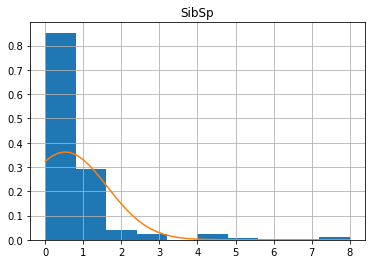

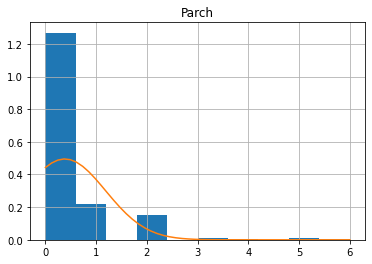

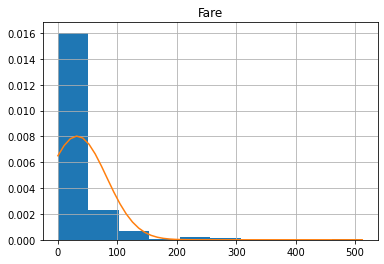

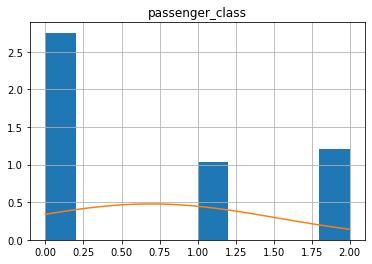

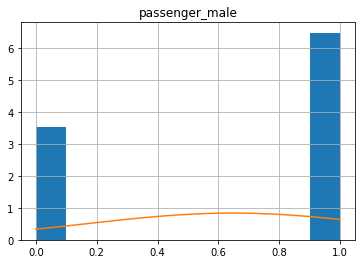

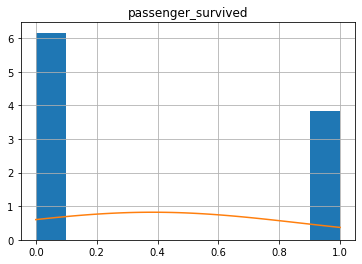

In [35]:
X = titanic_data
for col in ['SibSp', 'Parch', 'Fare',
       'passenger_class', 'passenger_male', 'passenger_survived']:
    X.loc[:, col].hist(density = True)
    norm_fit = norm.fit(X.loc[:, col])
    norm_dist_fitted = norm(*norm_fit)
    plt.title(col)

    X_range = X.loc[:, col].min(),X.loc[:, col].max()
    X_values =  np.linspace(*X_range)
    plt.plot(X_values,norm_dist_fitted.pdf(X_values))
    plt.show()

Eliminar columnas especificas que no aportan al modelo.


In [71]:
titanic_data.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
titanic_data.head()

,SibSp,Parch,Fare,passenger_class,passenger_sex,passenger_survived
0,1,0,7.2500,0.0,1,0
1,1,0,71.2833,2.0,0,1
2,0,0,7.9250,0.0,0,1
3,1,0,53.1000,2.0,0,1
4,0,0,8.0500,0.0,1,0


Separar datos en train y test

In [77]:
X_train, X_test, y_train, y_test = train_test_split(titanic_data.iloc[:, :-1], titanic_data[['passenger_survived']], test_size = 0.25, random_state = 42)

In [73]:
X_train.head()

,SibSp,Parch,Fare,passenger_class,passenger_sex
298,0,0,30.5000,2.0,1
884,0,0,7.0500,0.0,1
247,0,2,14.5000,1.0,0
478,0,0,7.5208,0.0,1
305,1,2,151.5500,2.0,1


In [74]:
y_train.head()

,passenger_survived
298,1
884,0
247,1
478,0
305,1


In [78]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.15, random_state = 45)

In [79]:
print(titanic_data.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)
print(X_valid.shape)

(891, 6)
(567, 5)
(223, 5)
(567, 1)
(223, 1)
(101, 1)
(101, 5)


Modelos :

In [104]:
def decisionTree(x, y, criterion = 'gini', splitter = 'best', max_depth = None, min_samples_split = 2):
    
    # Desicion trees
    model_dt = DecisionTreeClassifier(criterion = criterion, splitter = splitter, max_depth = max_depth, min_samples_split = min_samples_split)
    model_dt = model_dt.fit(x, y)

    
   
    A = joblib.dump(model_dt, 'svm_lr=0.01_reg=0.1_var1_var2_var3.pkl')
    print(A)
    return model_dt
    

In [93]:
decisionTree(X_train, y_train)

['svm_lr=0.01_reg=0.1_var1_var2_var3.pkl']


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [105]:
def SVM(x, y, c = 1, kernel = 'rbf', degree = 3):
    
    model_svc = SVC(C = c, kernel = kernel, degree = degree)
    model_svc = model_svc.fit(x.values, np.squeeze(y.values, axis = 1))

    
    
    return model_svc

In [103]:
SVM(X_train, y_train)

(SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 'SVM_C=1_kernel=rbf__SibSp_Parch_Fare_passenger_class_passenger_sex')

In [94]:
data = load(svm_lr=0.01_reg=0.1_var1_var2_var3.pkl, mmap_mode='r')

SyntaxError: ignored